In [1]:
from qiskit import *
from qiskit.visualization import *

In [2]:
old_qc = QuantumCircuit
del QuantumCircuit

# Define some custom custom gates
class QuantumCircuit(old_qc):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.qc = self

    def anti_ccx(self, control_qubit1, control_qubit2, target_qubit1):
        self.barrier(self.qubits)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.ccx(control_qubit1, control_qubit2, target_qubit1)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.barrier(self.qubits)

    def ccxx(self, control_qubit1, control_qubit2, target_qubit1, target_qubit2):
        self.barrier(self.qubits)
        self.ccx(control_qubit1, control_qubit2, target_qubit1)
        self.ccx(control_qubit1, control_qubit2, target_qubit2)
        self.barrier(self.qubits)

    def anti_ccxx(self, control_qubit1, control_qubit2, target_qubit1, target_qubit2):
        self.barrier(self.qubits)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.ccx(control_qubit1, control_qubit2, target_qubit1)
        self.ccx(control_qubit1, control_qubit2, target_qubit2)
        self.x(control_qubit1)
        self.x(control_qubit2)
        self.barrier(self.qubits)
    
    def measure_all(self, q = None, c = None):
        if not q:
            q = self.qubits
        if not c:
            c = self.clbits
        n = len(q)
        self.barrier(self.qubits)
        for i in range(n):
            self.measure(q[i], c[n-i-1])

In [3]:
q = QuantumRegister(3, 'motor')
c = ClassicalRegister(3, 'read')
circuit = QuantumCircuit(q, c)

In [4]:
ket_0 = [1, 0]
ket_1 = [0, 1]

# Demonstrating with sensor = |10>  Feel free to try with other 3 states (|00>, |01> and |11>) too.
quantumRead = [ket_0, ket_0]  # Similar to the digitalRead or analogRead functions of Arduino
circuit.initialize(quantumRead[0], [q[0]])
circuit.initialize(quantumRead[1], [q[1]])

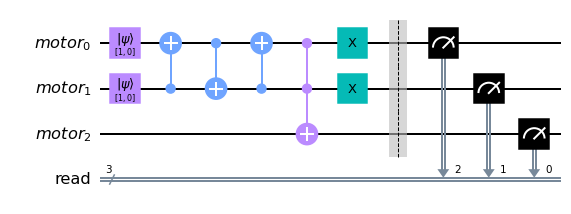

In [5]:
# circuit.h(q[0])
# circuit.h(q[1])

circuit.cx(q[1], q[0])
circuit.cx(q[0], q[1])
circuit.cx(q[1], q[0])
circuit.ccx(q[0], q[1], q[2])
circuit.x(q[0])
circuit.x(q[1])
circuit.measure_all()
circuit.draw(output="mpl")

In [6]:
comp = Aer.get_backend("qasm_simulator")
results = execute(circuit, comp).result()
# plot_histogram(results.get_counts(circuit))
list(results.get_counts(circuit).keys())

['110']

In [7]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
provider = IBMQ.get_provider('ibm-q')
q_comp = least_busy(provider.backends())
print(f"running on '{q_comp.name()}'")

running on 'ibm_nairobi'


Job Status: job has successfully run


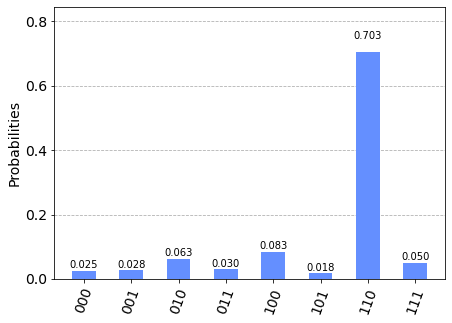

In [16]:
job = execute(circuit, q_comp)
job_monitor(job)
plot_histogram(job.result().get_counts(circuit))

In [24]:
print(dir(job))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_api_client', '_api_status', '_async', '_backend', '_cancelled', '_check_for_error_message', '_client_version', '_creation_date', '_data', '_error', '_executor', '_experiment_id', '_format_message_from_error', '_get_qobj', '_get_status_position', '_get_tags_to_update', '_job_error_msg', '_job_id', '_kind', '_name', '_qobj', '_queue_info', '_refreshed', '_result', '_retrieve_result', '_run_mode', '_set_client_version', '_set_result', '_share_level', '_status', '_status_callback', '_tags', '_time_per_step', '_use_object_storage', '_wait_for_completion', 'backend', 'backend_options', 'c

In [27]:
job.status()

'job has successfully run'